In [1]:
from situr.image import SituImage
from situr.registration import PeakFinderDifferenceOfGaussian
from situr.registration import FilterregRegistrationFunction, SituImageChannelRegistration


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
situ_img = SituImage([['./artificial_img/original.tif'], ['./artificial_img/rotated.tif']])
situ_img.get_data()

array([[[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]],


       [[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]]], dtype=uint16)

In [3]:
peak_finder = PeakFinderDifferenceOfGaussian(threshold=0.01)
peaks = peak_finder.get_channel_peaks(situ_img, 0)
peaks.shape

(8, 2)

In [4]:
peak_finder.get_channel_peaks(situ_img, 0)

array([[ 355.,  896.],
       [ 398., 1490.],
       [ 818., 1061.],
       [1481.,  872.],
       [1442.,  341.],
       [ 965.,  338.],
       [ 318.,  305.],
       [1419., 1644.]])

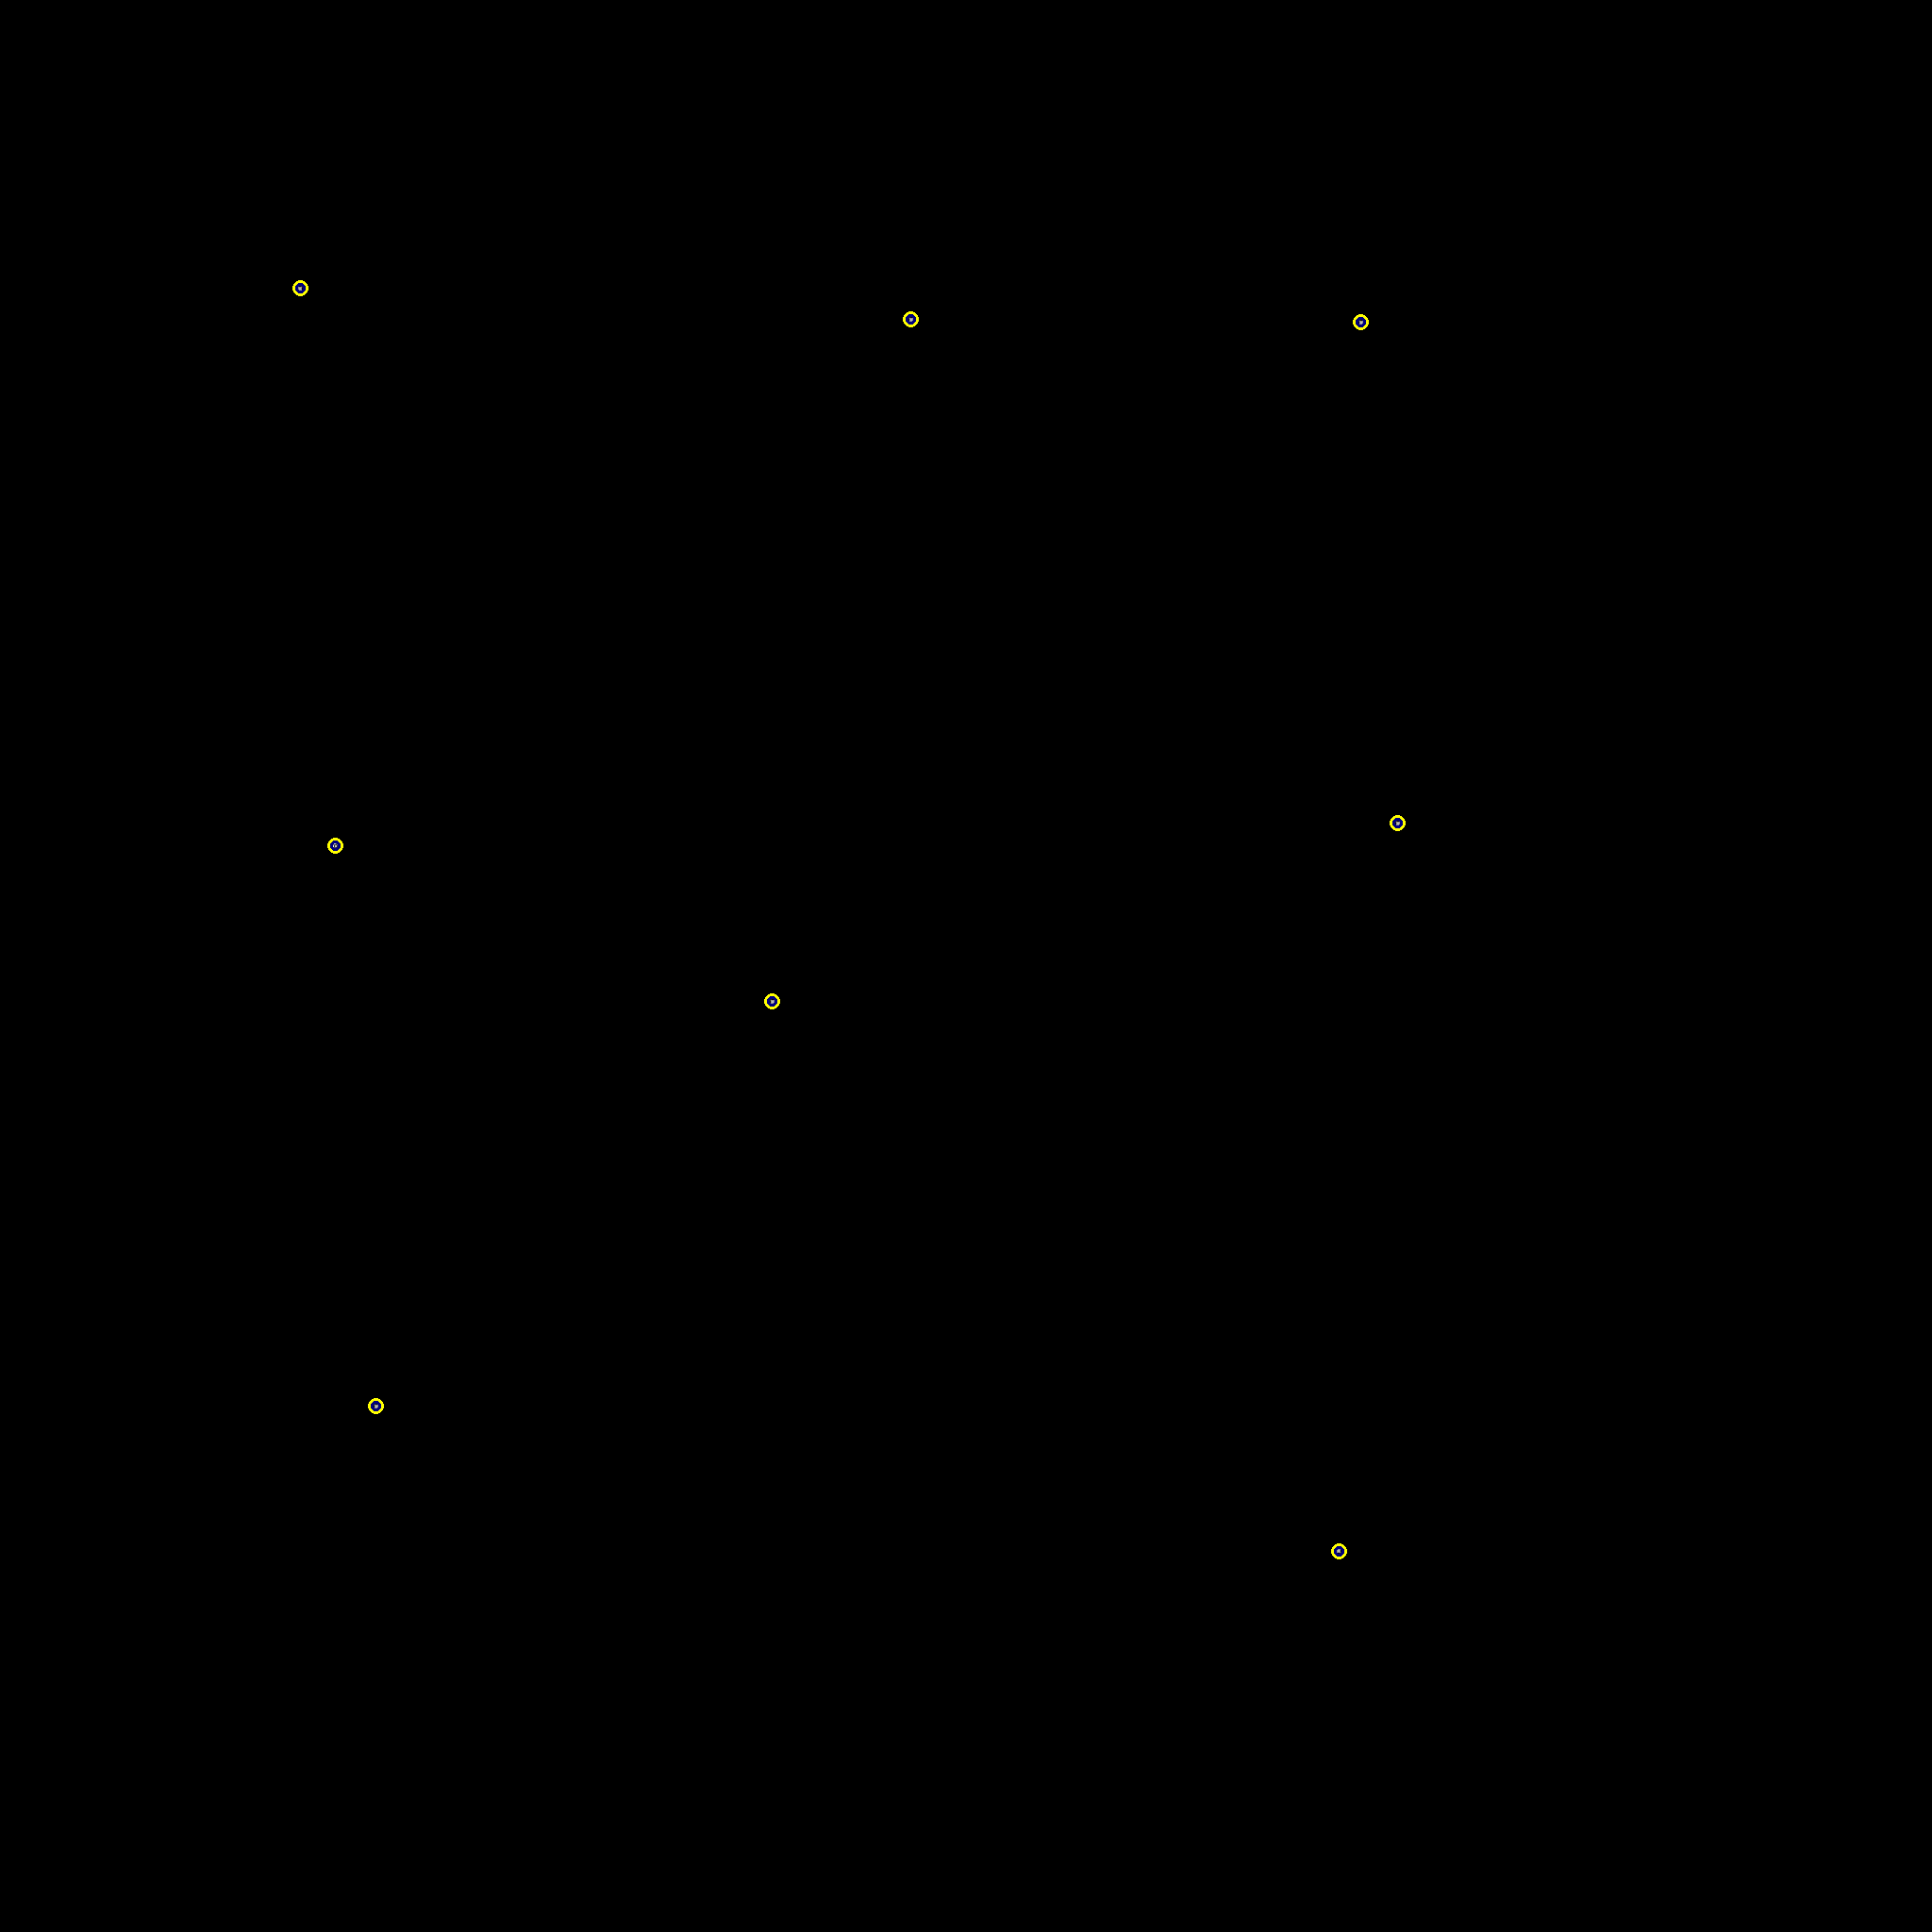

In [5]:
peak_finder.show_channel_peaks(situ_img, 0, img_show=False)

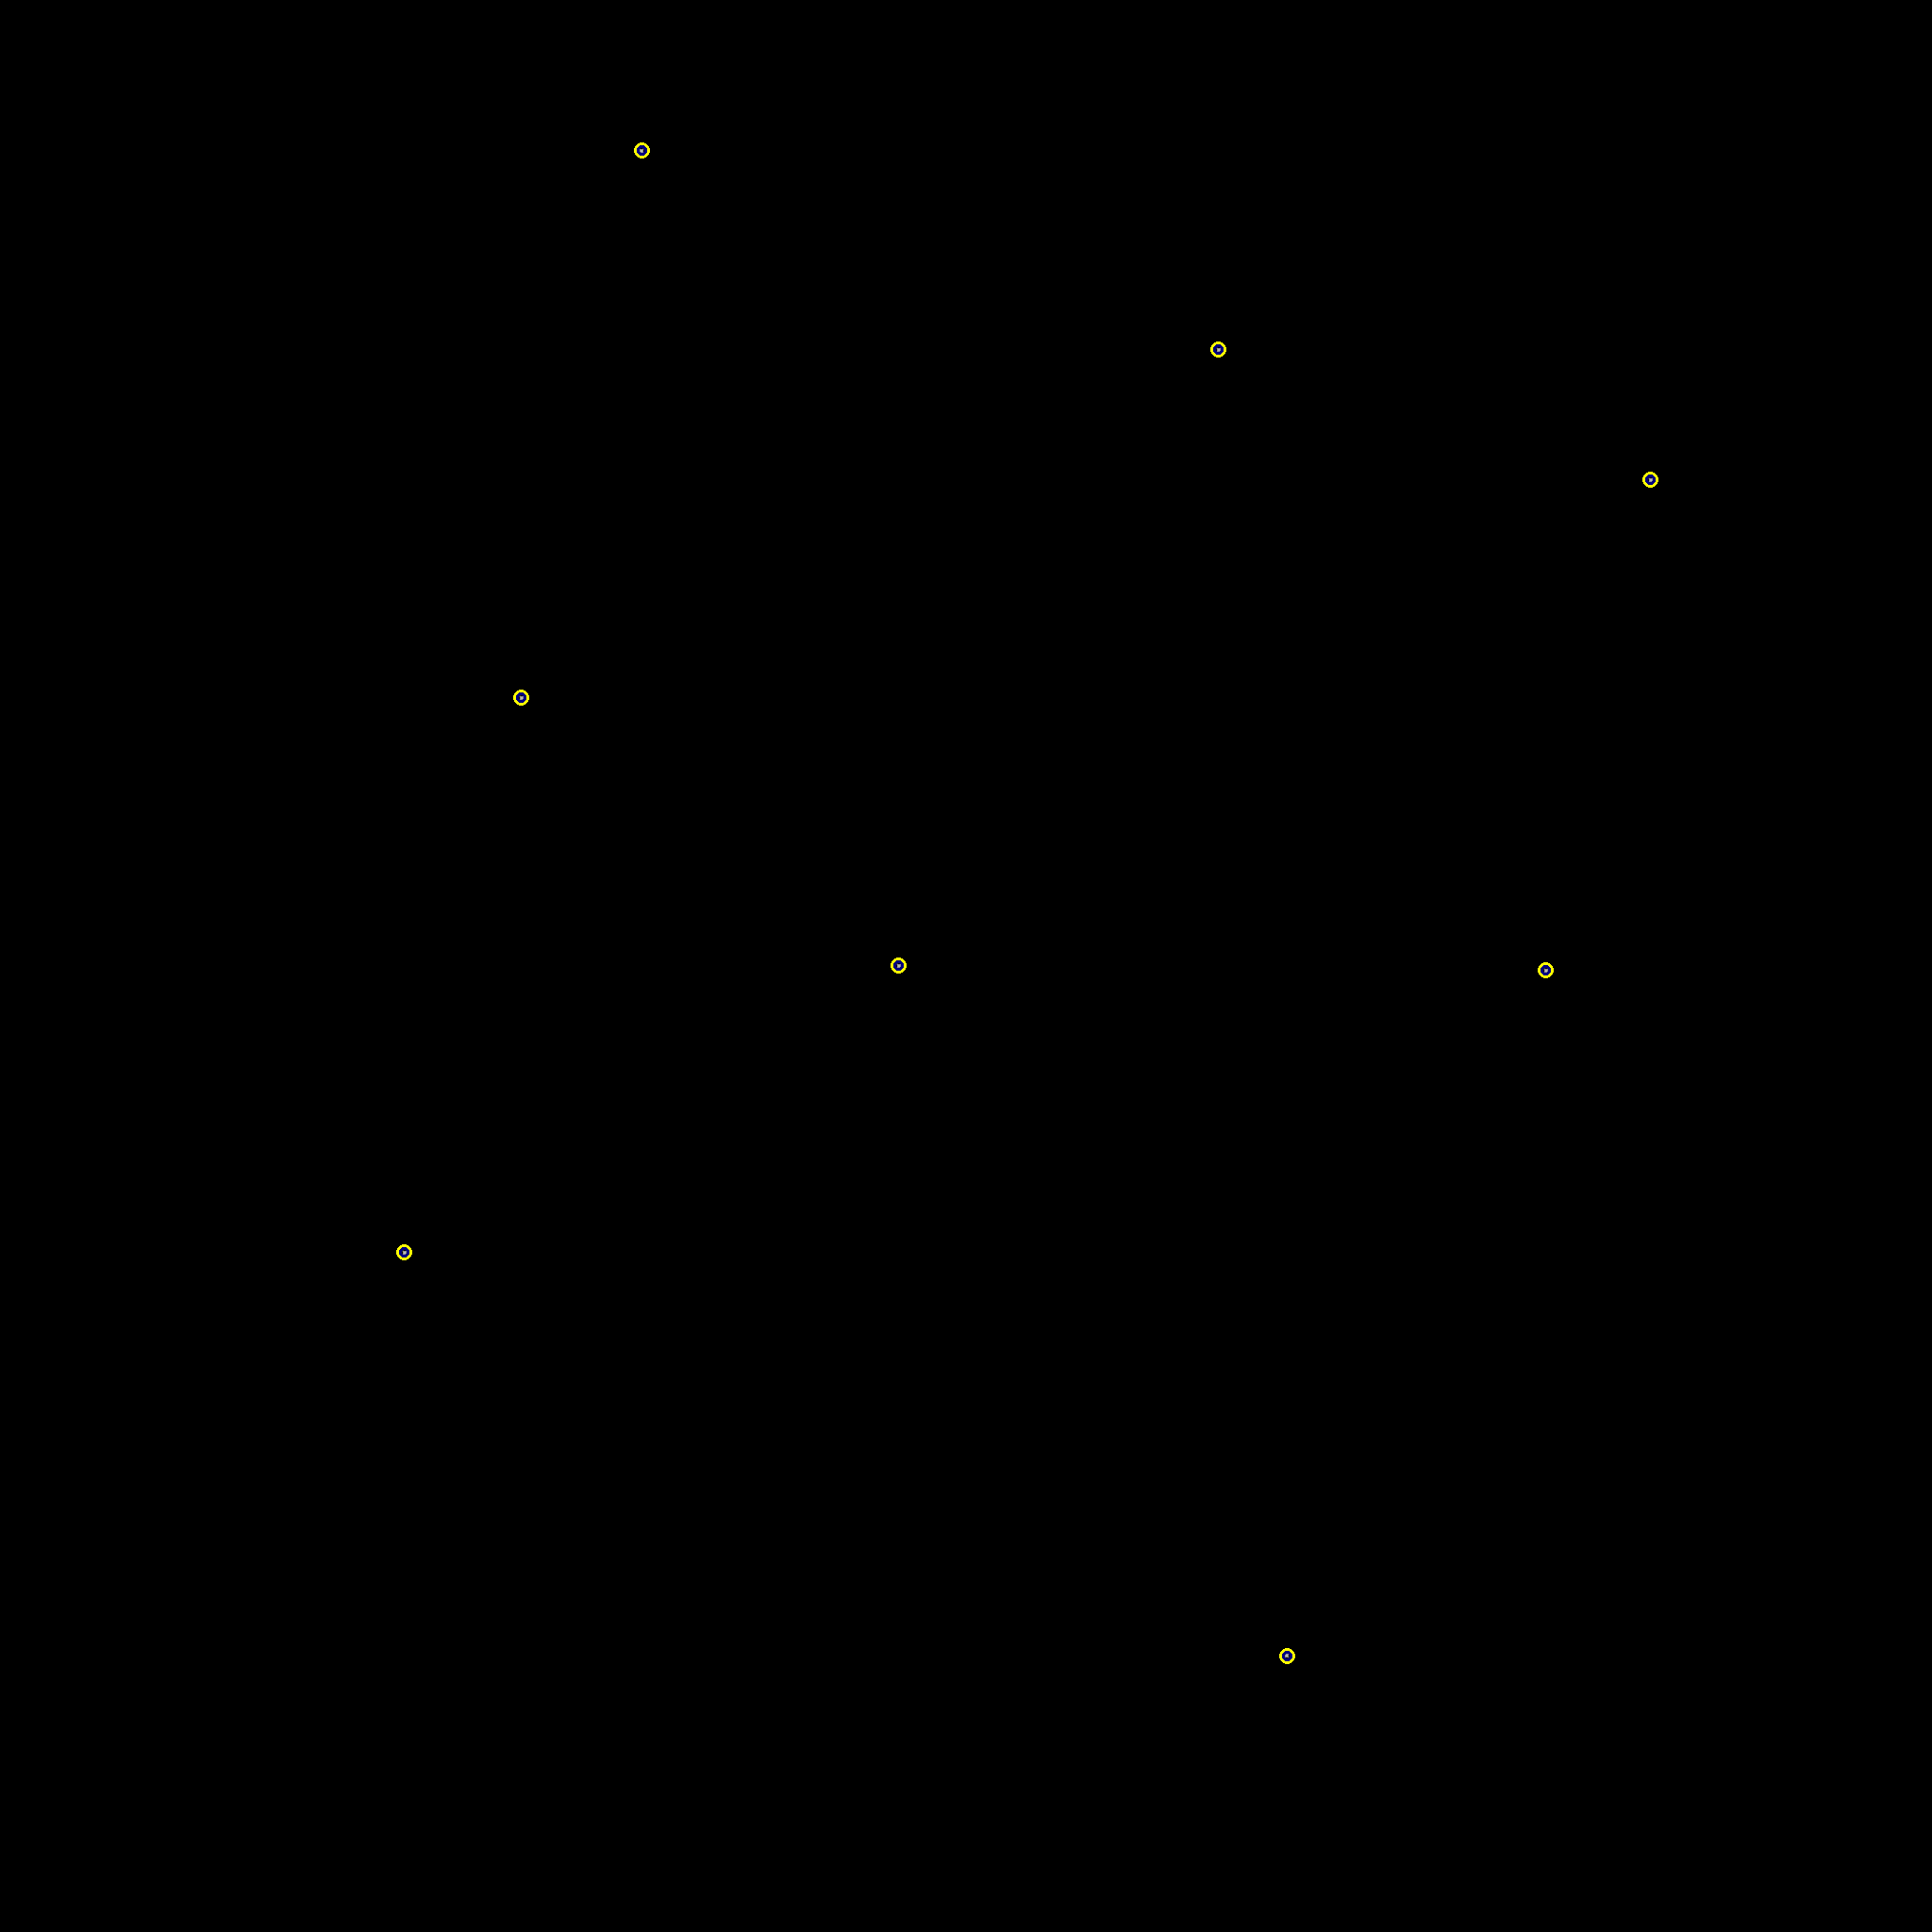

In [6]:
peak_finder.show_channel_peaks(situ_img, 1, img_show=False)

In [7]:
registration = SituImageChannelRegistration(FilterregRegistrationFunction(), peak_finder=peak_finder)
registration.do_channel_registration(situ_img)

print(situ_img.get_channel(0))
situ_img.apply_transformations()
print(situ_img.get_channel(1))

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


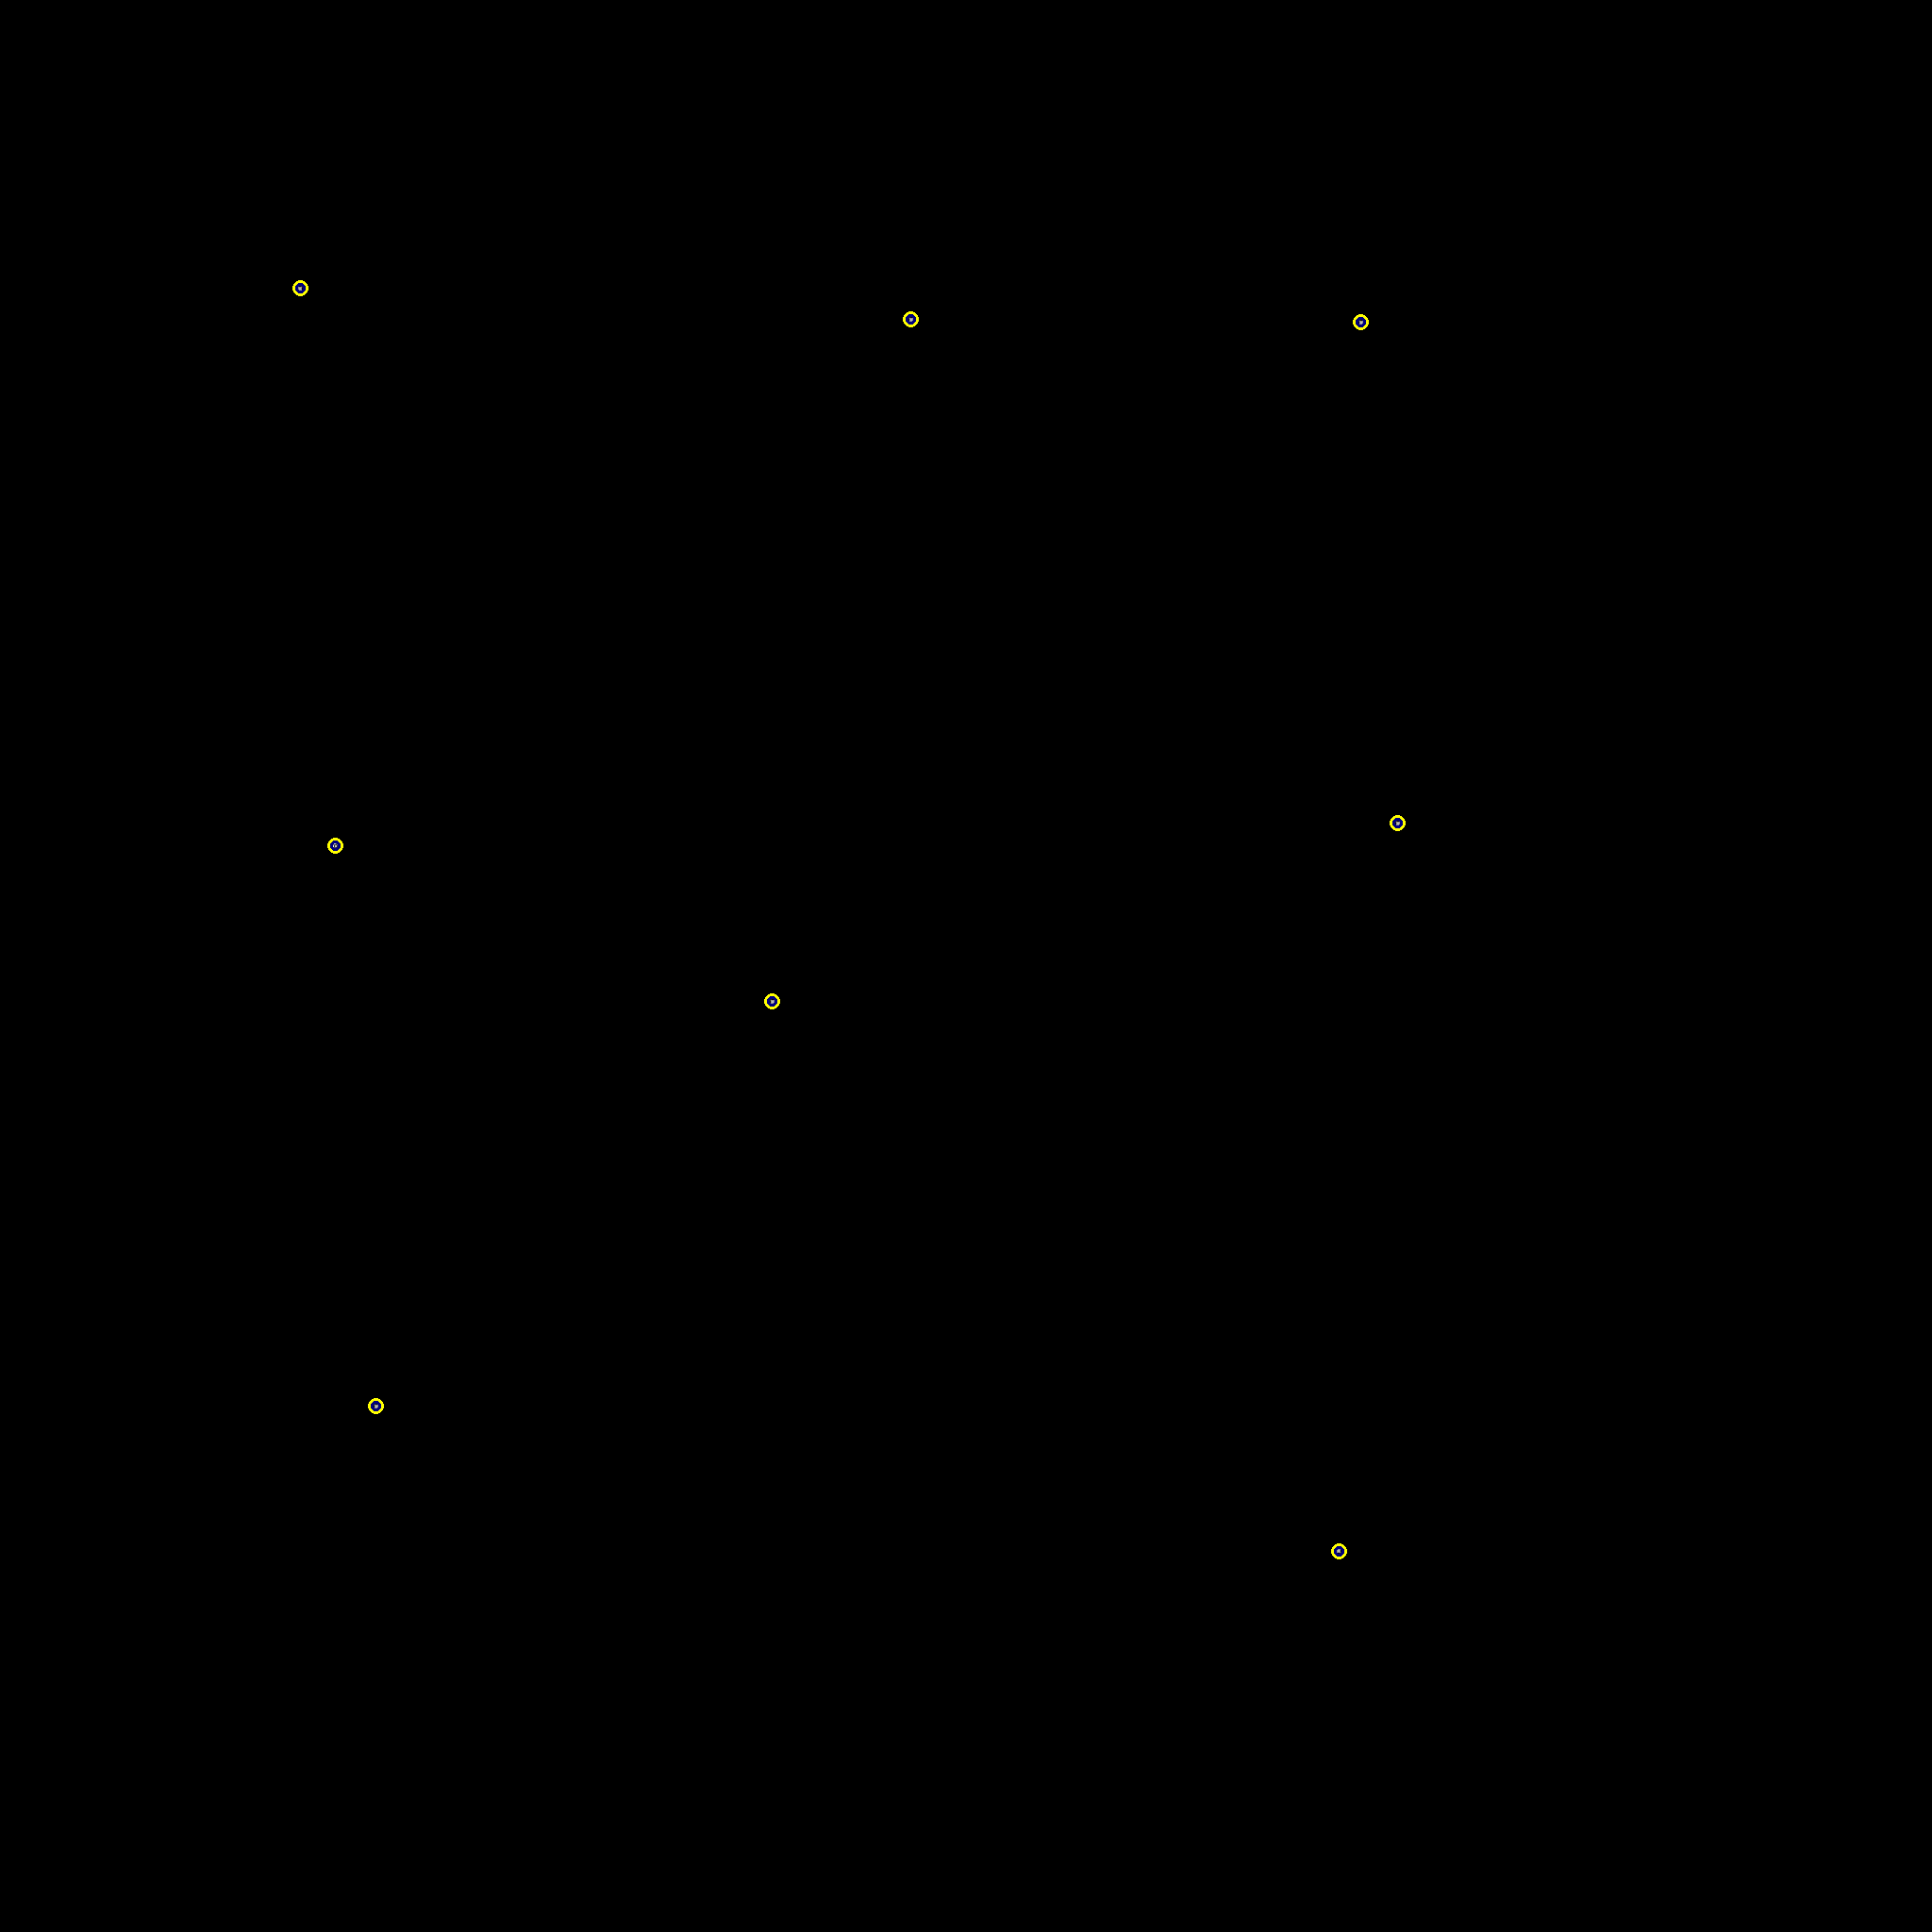

In [8]:
peak_finder.show_channel_peaks(situ_img, 0, img_show=False)

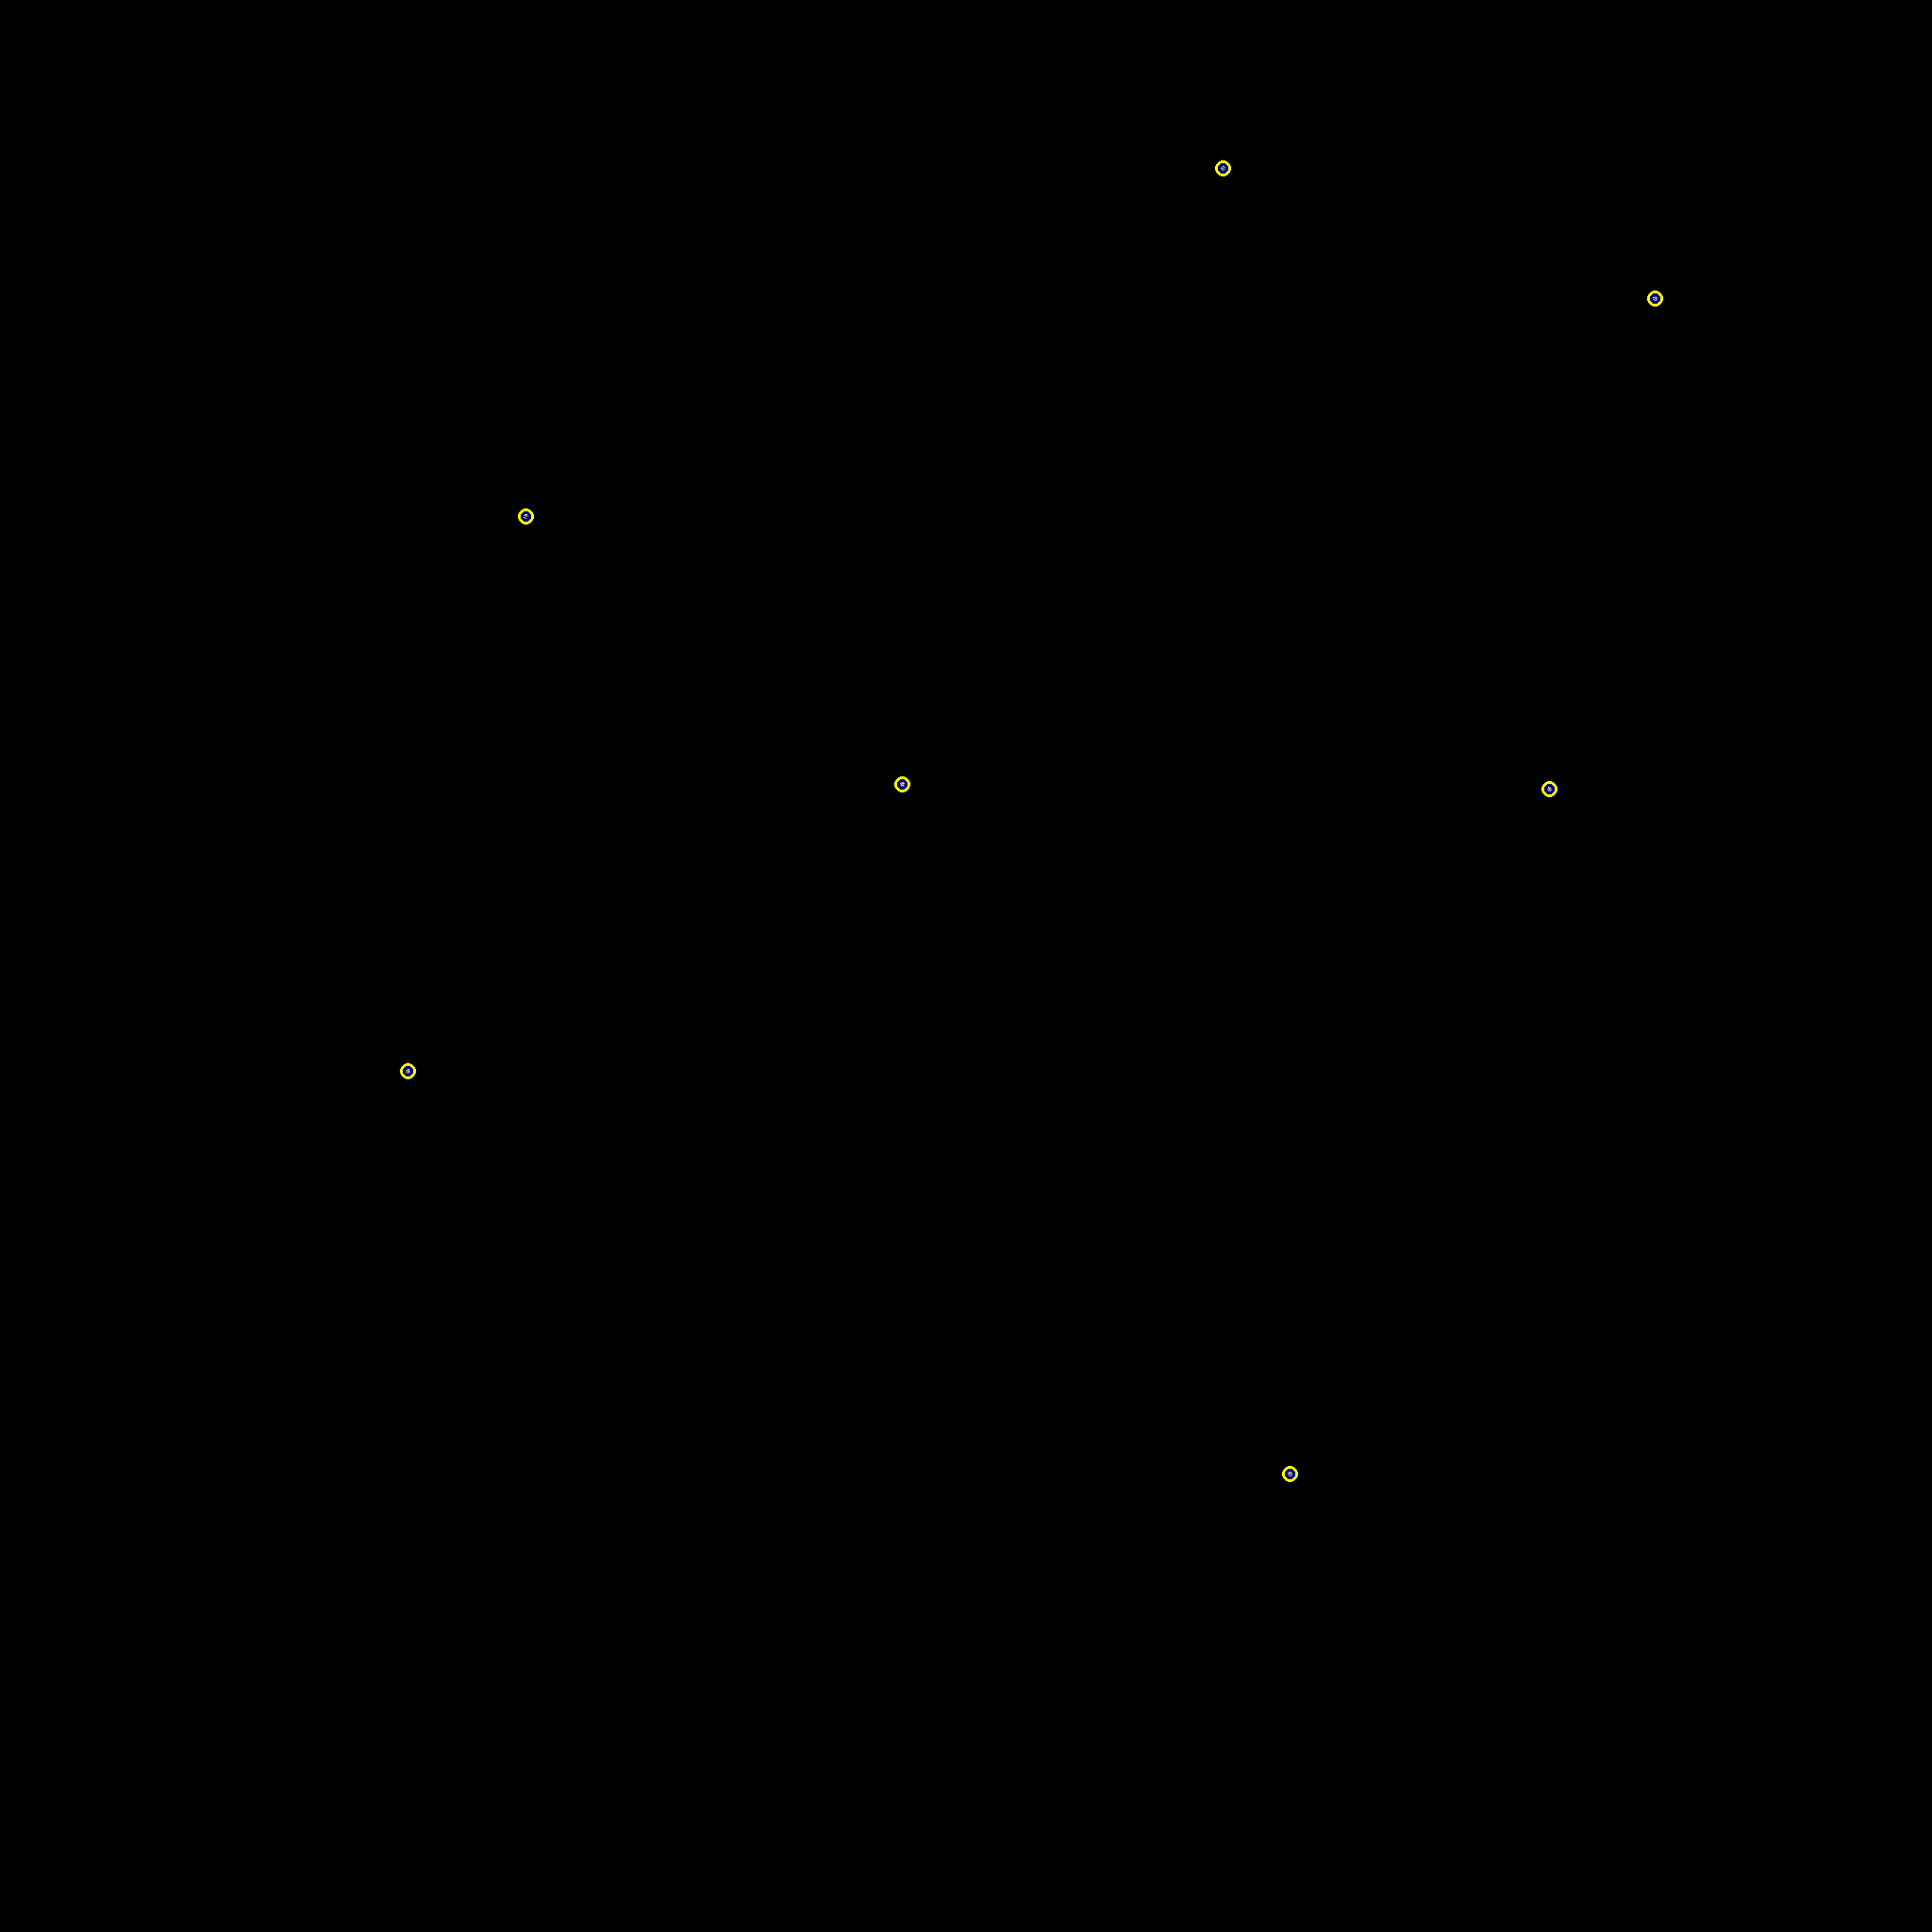

In [9]:
peak_finder.show_channel_peaks(situ_img, 1, img_show=False)

In [10]:
print(situ_img.channel_transformations[1].offset)
print(situ_img.channel_transformations[1].scale)
print(situ_img.channel_transformations[1].transform_matrix)

[-192.46771011    4.13591988]
1.0
[[ 1.00000026e+00 -1.65759981e-04]
 [ 1.65759981e-04  1.00000026e+00]]
